## Imports

In [17]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os, cv2, shutil
from tqdm import tqdm_notebook,trange
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

## Data Import

In [2]:
data = pd.read_csv('./cancer_detection/train_labels.csv')
data.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


## EDA

In [3]:
len_train = len(os.listdir("./cancer_detection/train/"))
len_test = len(os.listdir("./cancer_detection/test/"))

In [4]:
print('{} pictures in train.'.format(len_train))
print('{} pictures in test.'.format(len_test))

220025 pictures in train.
57458 pictures in test.


In [5]:
data['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

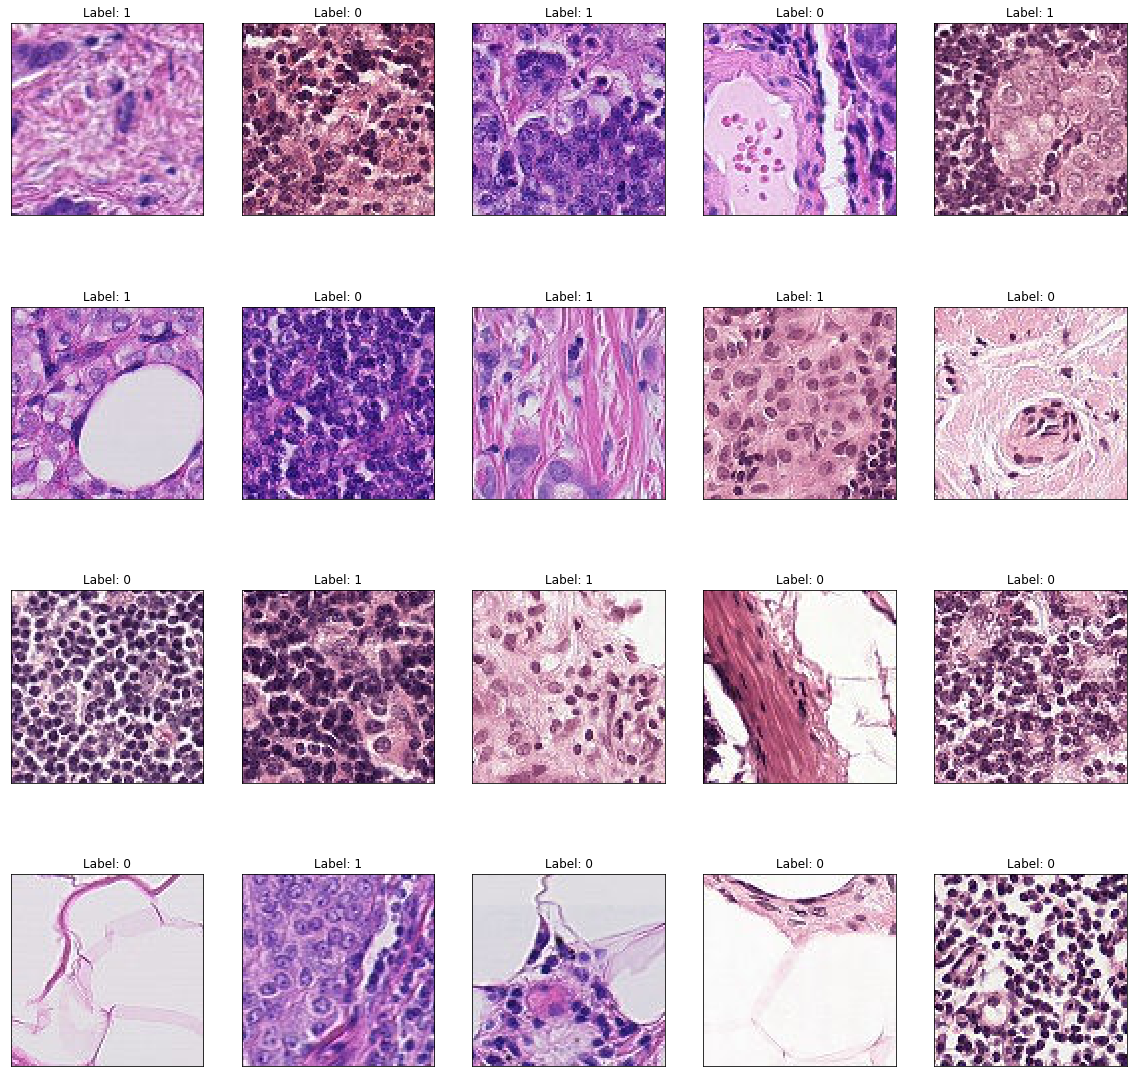

In [6]:
fig = plt.figure(figsize=(20, 20))
# display 20 images
train_imgs = os.listdir('./cancer_detection/train/')
for i, img in enumerate(np.random.choice(train_imgs, 20)):
    ax = fig.add_subplot(4, 20//4, i+1, xticks=[], yticks=[])
    im = Image.open('./cancer_detection/train/' + img)
    plt.imshow(im)
    label = data.loc[data['id'] == img.split('.')[0], 'label'].values[0]
    ax.set_title('Label: {}'.format(label))

## Create Directories

In [3]:
# Split into Train and Validation Sets
y = data['label']
df_train, df_val = train_test_split(data, test_size = 0.1, random_state = 0, stratify = y)

In [7]:
# Create a directory structure to load data into image generator
base_dir = 'base_dir'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

no_tumor = os.path.join(train_dir, 'no_tumor')
os.mkdir(no_tumor)
tumor = os.path.join(train_dir, 'tumor')
os.mkdir(tumor)

no_tumor = os.path.join(val_dir, 'no_tumor')
os.mkdir(no_tumor)
tumor = os.path.join(val_dir, 'tumor')
os.mkdir(tumor)

In [25]:
# Transfer images into their respective directories
data.set_index('id', inplace=True)

train_list = list(df_train['id'])
val_list = list(df_val['id'])

for img in train_list:
    file_name = img + '.tif'
    target = data.loc[img,'label']
    
    if target == 0:
        label = 'no_tumor'
    elif target == 1:
        label = 'tumor'
        
    src = os.path.join('./cancer_detection/train', file_name)
    dest = os.path.join(train_dir, label, file_name)
    shutil.copyfile(src, dest)
    
for img in val_list:
    file_name = img + '.tif'
    target = data.loc[img,'label']
    
    if target == 0:
        label = 'no_tumor'
    elif target == 1:
        label = 'tumor'
    
    src = os.path.join('./cancer_detection/train', file_name)
    dest = os.path.join(val_dir, label, file_name)
    shutil.copyfile(src, dest)

In [28]:
data.head()

,label
id,
f38a6374c348f90b587e046aac6079959adf3835,0
c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
755db6279dae599ebb4d39a9123cce439965282d,0
bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
068aba587a4950175d04c680d38943fd488d6a9d,0


In [27]:
print(len(os.listdir('base_dir/train_dir/tumor')))
print(len(os.listdir('base_dir/train_dir/no_tumor')))
print(len(os.listdir('base_dir/val_dir/tumor')))
print(len(os.listdir('base_dir/val_dir/no_tumor')))

80205
117817
8912
13091
